In [21]:
import os
import pickle
import streamlit as st
from streamlit_option_menu import option_menu
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pickle

In [2]:
!pip install streamlit-option-menu


   ---------------------------------------- 0.0/829.3 kB ? eta -:--:--
    -------------------------------------- 20.5/829.3 kB 640.0 kB/s eta 0:00:02
   ----- ---------------------------------- 112.6/829.3 kB 1.7 MB/s eta 0:00:01
   --------- ------------------------------ 204.8/829.3 kB 2.1 MB/s eta 0:00:01
   ----------- ---------------------------- 245.8/829.3 kB 1.7 MB/s eta 0:00:01
   ----------- ---------------------------- 245.8/829.3 kB 1.7 MB/s eta 0:00:01
   ----------- -------------------------- 256.0/829.3 kB 983.0 kB/s eta 0:00:01
   ------------ ------------------------- 276.5/829.3 kB 947.5 kB/s eta 0:00:01
   ------------- ------------------------ 286.7/829.3 kB 886.2 kB/s eta 0:00:01
   ------------- ------------------------ 286.7/829.3 kB 886.2 kB/s eta 0:00:01
   -------------- ----------------------- 307.2/829.3 kB 731.4 kB/s eta 0:00:01
   -------------------- ----------------- 440.3/829.3 kB 917.0 kB/s eta 0:00:01
   --------------------- ---------------- 471.0/8

In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('AppendicitisTrainingDataset.csv')

# Define the column types based on schema requirements

# Columns to impute with mean for numeric data
numeric_columns = [
    'Age', 'BMI', 'Height', 'Weight', 'Length_of_Stay', 'Appendix_Diameter', 
    'Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage', 'Segmented_Neutrophils', 
    'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'CRP'
]

# Columns to impute with most frequent value for categorical/binary data
categorical_columns = [
    'Sex', 'Management', 'Severity', 'Diagnosis',  
    'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_on_US', 'Migratory_Pain', 
    'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 
    'Nausea', 'Loss_of_Appetite', 'Neutrophilia', 'Ketones_in_Urine', 'RBC_in_Urine', 
    'WBC_in_Urine', 'Dysuria', 'Stool', 'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness', 
    'US_Performed', 'Free_Fluids', 'Appendix_Wall_Layers', 'Target_Sign', 'Appendicolith', 
    'Perfusion', 'Perforation', 'Surrounding_Tissue_Reaction', 'Appendicular_Abscess', 
    'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location', 
    'Bowel_Wall_Thickening', 'Conglomerate_of_Bowel_Loops', 'Ileus', 'Coprostasis', 
    'Meteorism', 'Enteritis', 'Gynecological_Findings'
]

# Check if any column is missing
missing_numeric_columns = [col for col in numeric_columns if col not in df.columns]
missing_categorical_columns = [col for col in categorical_columns if col not in df.columns]

if missing_numeric_columns:
    print(f"Missing numeric columns: {missing_numeric_columns}")

if missing_categorical_columns:
    print(f"Missing categorical columns: {missing_categorical_columns}")

# Proceed only if all columns are present
if not missing_numeric_columns and not missing_categorical_columns:
    # Impute missing values for numeric columns with mean
    numeric_imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

    # Impute missing values for categorical columns with most frequent value
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

    # Save the modified dataset to a new CSV file
    output_path = 'AppendicitisTrainingDatasetModifiedV1MissingReplaced.csv'
    df.to_csv(output_path, index=False)

    print(f"Dataset with missing values replaced has been saved as {output_path}")
else:
    print("Please update the missing columns and try again.")


Dataset with missing values replaced has been saved as AppendicitisTrainingDatasetModifiedV1MissingReplaced.csv


In [24]:
appendicitis_dataset_finalized = pd.read_csv('AppendicitisTrainingDatasetModifiedV1MissingReplaced.csv')
data_encoded = pd.get_dummies(appendicitis_dataset_finalized, drop_first=True)

In [25]:
appendicitis_dataset_finalized.shape

(624, 56)

Gen AI in future

In [30]:

# separating the data and labels
X = appendicitis_dataset_finalized.drop(columns = 'Diagnosis', axis=1)
Y = appendicitis_dataset_finalized['Diagnosis']

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, stratify=Y, random_state=5)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(624, 55) (436, 55) (188, 55)


In [33]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)


ValueError: could not convert string to float: 'male'

In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('AppendicitisTrainingDatasetModifiedV1MissingReplaced.csv')  # Replace with the path to your dataset

# Data Preprocessing
# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features and target
X = data_encoded.drop('Diagnosis', axis=1)  # Adjust if "Diagnosis" is the target
y = data_encoded['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Feature Importance Visualization
plt.figure(figsize=(12, 8))
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
features = X.columns

# Plot
sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")
plt.title('Feature Importances in Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# Visualizing a Single Decision Tree from the Random Forest
# Extract a single tree from the Random Forest
tree = rf.estimators_[0]  # Get the first tree from the forest

# Plot the tree using matplotlib
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, class_names=['no appendicitis', 'appendicitis'], filled=True, rounded=True, fontsize=10)
plt.title('Visualization of a Single Decision Tree from the Random Forest')
plt.show()

# Save the Random Forest model to a .sav file
model_filename = 'random_forest_model.sav'
pickle.dump(rf, open(model_filename, 'wb'))
print(f"Model saved as {model_filename}")


KeyError: "['Diagnosis'] not found in axis"

In [35]:
!pip install matplotlib


     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     --------- --------------------------- 41.0/167.0 kB 991.0 kB/s eta 0:00:01
     -------------------------------------  163.8/167.0 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 167.0/167.0 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/7.8 MB 16.3 MB/s eta 0:00:01
   ------------- -------------------------- 2.7/7.8 MB 28.1 MB/s eta 0:00:01
   ------------------------ --------------- 4.8/7.8 MB 33.7 MB/s eta 0:00:01
   -------------------------------- ------- 6.4/7.8 MB 34.2 MB/s eta 0:00:01
   ---------------------------------------  7.8/7.8 MB 35.7 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 29.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/218.3 kB ? eta -:--:--
   ---------------------------------------- 218.3/218.3 kB ? eta 0:00:00
   ---------

In [37]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.9 kB 825.8 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00


In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('AppendicitisTrainingDatasetModifiedV1MissingReplaced.csv')  # Replace with the path to your dataset

# Check if 'Diagnosis' column exists in the original data
if 'Diagnosis' not in data.columns:
    raise KeyError("The 'Diagnosis' column is missing from the dataset.")

# Data Preprocessing
# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Confirm 'Diagnosis' column is present in encoded data
if 'Diagnosis' not in data_encoded.columns:
    raise KeyError("The 'Diagnosis' column is missing after encoding.")

# Separate features and target
X = data_encoded.drop('Diagnosis', axis=1)  # Adjust if "Diagnosis" is the target
y = data_encoded['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Feature Importance Visualization
plt.figure(figsize=(12, 8))
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
features = X.columns

# Plot
sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")
plt.title('Feature Importances in Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# Visualizing a Single Decision Tree from the Random Forest
# Extract a single tree from the Random Forest
tree = rf.estimators_[0]  # Get the first tree from the forest

# Plot the tree using matplotlib
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, class_names=['no appendicitis', 'appendicitis'], filled=True, rounded=True, fontsize=10)
plt.title('Visualization of a Single Decision Tree from the Random Forest')
plt.show()

# Save the Random Forest model to a .sav file
model_filename = 'random_forest_model.sav'
pickle.dump(rf, open(model_filename, 'wb'))
print(f"Model saved as {model_filename}")


KeyError: "The 'Diagnosis' column is missing after encoding."

Accuracy: 0.99


C:\Users\pradc\AppData\Local\Temp\ipykernel_19560\3344612835.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")


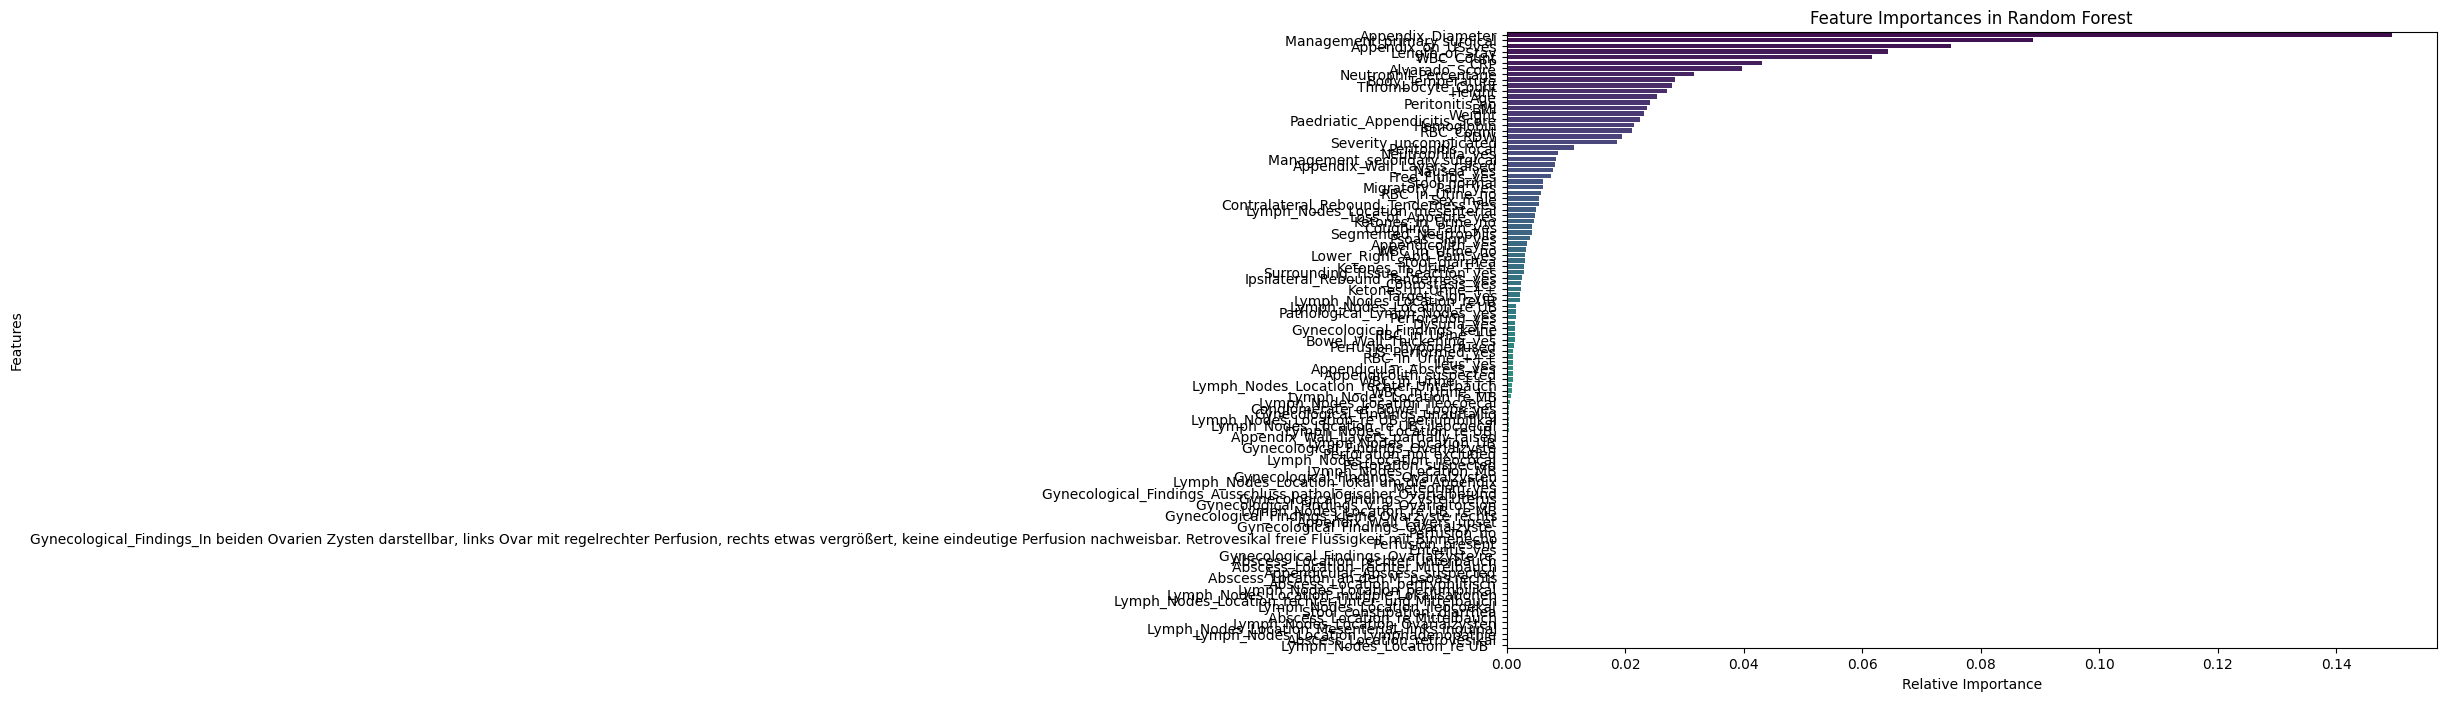

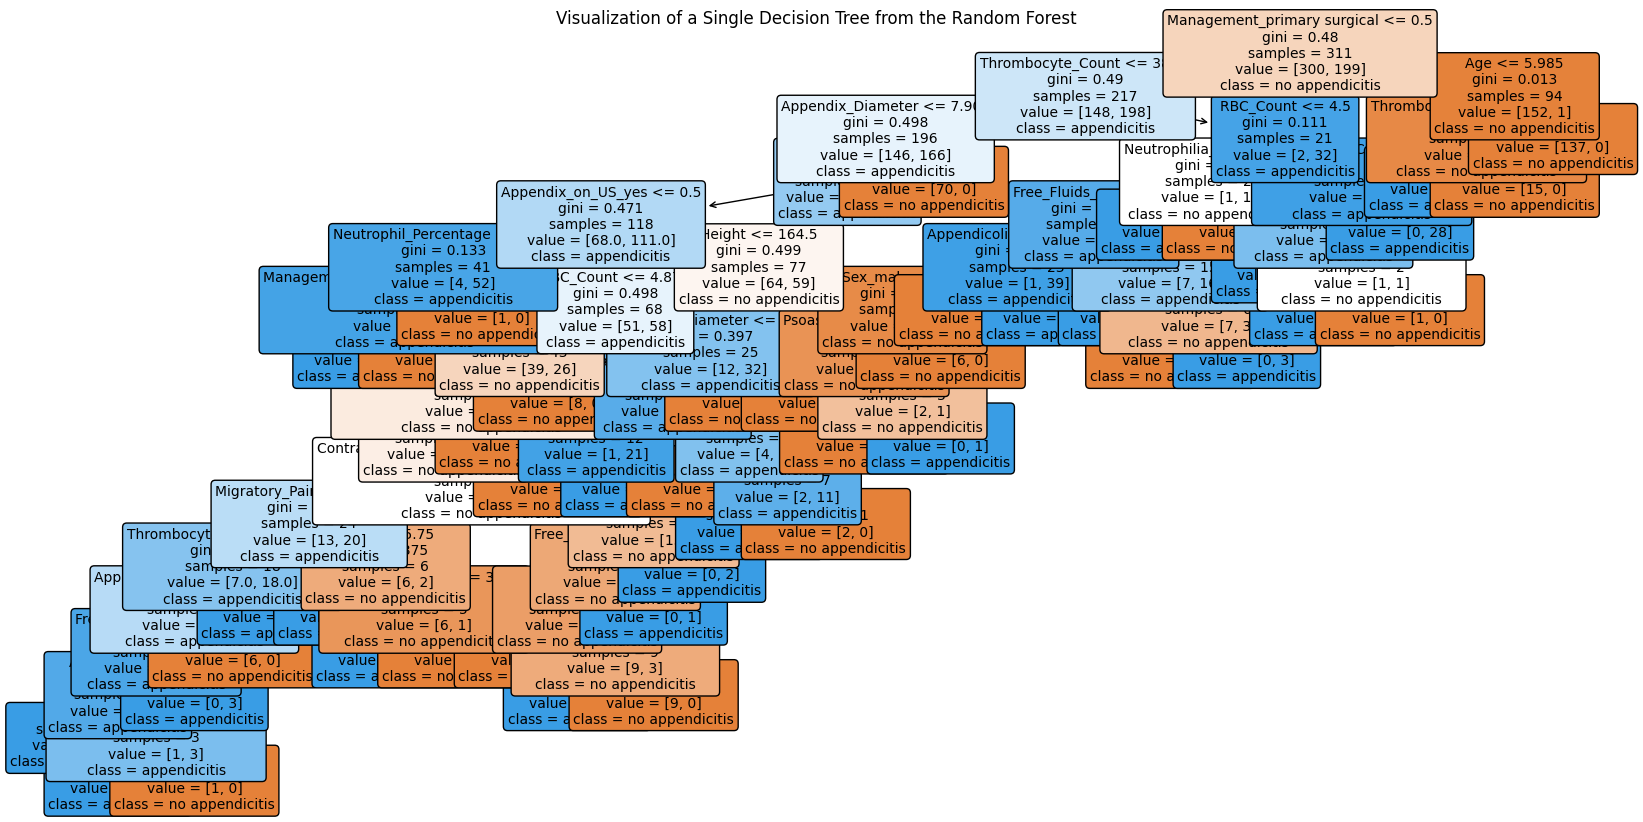

Model saved as random_forest_model.pkl


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('AppendicitisTrainingDatasetModifiedV1MissingReplaced.csv')  # Replace with the path to your dataset

# Check if 'Diagnosis' column exists in the original data
if 'Diagnosis' not in data.columns:
    raise KeyError("The 'Diagnosis' column is missing from the dataset.")

# Separate features and target
y = data['Diagnosis']  # Target variable
X = data.drop('Diagnosis', axis=1)  # Features

# Encode categorical variables in features only
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Feature Importance Visualization
plt.figure(figsize=(12, 8))
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
features = X_encoded.columns

# Plot
sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")
plt.title('Feature Importances in Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# Visualizing a Single Decision Tree from the Random Forest
# Extract a single tree from the Random Forest
tree = rf.estimators_[0]  # Get the first tree from the forest

# Plot the tree using matplotlib
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, class_names=['no appendicitis', 'appendicitis'], filled=True, rounded=True, fontsize=10)
plt.title('Visualization of a Single Decision Tree from the Random Forest')
plt.show()

# Save the Random Forest model to a .sav file
model_filename = 'random_forest_model.pkl'
pickle.dump(rf, open(model_filename, 'wb'))
print(f"Model saved as {model_filename}")


In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('AppendicitisTrainingDatasetModifiedV1MissingReplaced.csv')  # Replace with the path to your dataset

# Check if 'Diagnosis' column exists in the original data
if 'Diagnosis' not in data.columns:
    raise KeyError("The 'Diagnosis' column is missing from the dataset.")

# Separate features and target
y = data['Diagnosis']  # Target variable
X = data.drop('Diagnosis', axis=1)  # Features

# Encode categorical variables in features only
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Feature Importance Visualization
plt.figure(figsize=(12, 8))
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
features = X_encoded.columns

# Plot
sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")
plt.title('Feature Importances in Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Features')

# Save the feature importance plot as PNG
feature_importance_filename = 'feature_importance_plot.png'
plt.savefig(feature_importance_filename)
print(f"Feature importance plot saved as {feature_importance_filename}")
plt.show()

# Visualizing a Single Decision Tree from the Random Forest
# Extract a single tree from the Random Forest
tree = rf.estimators_[0]  # Get the first tree from the forest

# Plot the tree using matplotlib
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, class_names=['no appendicitis', 'appendicitis'], filled=True, rounded=True, fontsize=10)
plt.title('Visualization of a Single Decision Tree from the Random Forest')

# Save the decision tree plot as PNG
tree_plot_filename = 'decision_tree_plot.png'
plt.savefig(tree_plot_filename)
print(f"Decision tree plot saved as {tree_plot_filename}")
plt.show()

# Save the Random Forest model to a .sav file
model_filename = 'random_forest_model.sav'
pickle.dump(rf, open(model_filename, 'wb'))
print(f"Model saved as {model_filename}")


Accuracy: 0.99


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\816629277.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")


Feature importance plot saved as feature_importance_plot.png


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\816629277.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


Decision tree plot saved as decision_tree_plot.png
Model saved as random_forest_model.sav


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\816629277.py:69: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [43]:
columns=data.columns

In [44]:
columns

Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay',
       'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_on_US',
       'Appendix_Diameter', 'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count',
       'Neutrophil_Percentage', 'Segmented_Neutrophils', 'Neutrophilia',
       'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count',
       'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'CRP', 'Dysuria',
       'Stool', 'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness',
       'US_Performed', 'Free_Fluids', 'Appendix_Wall_Layers', 'Target_Sign',
       'Appendicolith', 'Perfusion', 'Perforation',
       'Surrounding_Tissue_Reaction', 'Appendicular_Abscess',
       'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location',
       'Bowel_Wall_Thickening', 'Conglomerate_of_Bowel_Loops', 'Ileus',
       'Coprostasis', 'Me

In [45]:
!pip install graphviz


   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 784.8 kB/s eta 0:00:00


In [46]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree, export_graphviz
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz  # Importing graphviz for a better tree plot

# Load the dataset
data = pd.read_csv('AppendicitisTrainingDatasetModifiedV1MissingReplaced.csv')  # Replace with the path to your dataset

# Check if 'Diagnosis' column exists in the original data
if 'Diagnosis' not in data.columns:
    raise KeyError("The 'Diagnosis' column is missing from the dataset.")

# Separate features and target
y = data['Diagnosis']  # Target variable
X = data.drop('Diagnosis', axis=1)  # Features

# Encode categorical variables in features only
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Feature Importance Visualization
plt.figure(figsize=(12, 8))
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
features = X_encoded.columns

# Plot
sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")
plt.title('Feature Importances in Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Features')

# Save the feature importance plot as PNG
feature_importance_filename = 'feature_importance_plot.png'
plt.savefig(feature_importance_filename)
print(f"Feature importance plot saved as {feature_importance_filename}")
plt.show()

# Visualizing a Single Decision Tree from the Random Forest
# Extract a single tree from the Random Forest
tree = rf.estimators_[0]  # Get the first tree from the forest

# Use export_graphviz to generate the tree in DOT format
dot_data = export_graphviz(tree, 
                           feature_names=features, 
                           class_names=['no appendicitis', 'appendicitis'], 
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

# Use graphviz to create a visually appealing plot
graph = graphviz.Source(dot_data)

# Render and display the tree
graph.render("decision_tree_graph", format="png", cleanup=True)  # Saves the plot as a PNG
graph.view()  # Opens the tree in the default viewer

print("Decision tree plot saved as 'decision_tree_graph.png'")


Accuracy: 0.99


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\3473365995.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")


Feature importance plot saved as feature_importance_plot.png


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\3473365995.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [47]:
# Scatter plot for predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line for comparison
plt.title('Predicted vs Actual Diagnosis')
plt.xlabel('Actual Diagnosis')
plt.ylabel('Predicted Diagnosis')
plt.show()

C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\703305400.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line for comparison
plt.title('Predicted vs Actual Diagnosis')
plt.xlabel('Actual Diagnosis')
plt.ylabel('Predicted Diagnosis')

# Save the plot to a file
scatter_plot_filename = 'predicted_vs_actual_diagnosis.png'
plt.savefig(scatter_plot_filename)

# Provide a message confirming the save location
print(f"Scatter plot saved as {scatter_plot_filename}")

Scatter plot saved as predicted_vs_actual_diagnosis.png


In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assume data is already loaded and features encoded

# Extract feature importances from Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
X_encoded = pd.get_dummies(X, drop_first=True)
y = data['Diagnosis']
rf.fit(X_encoded, y)
feature_importances = rf.feature_importances_

# Setup the number of features
num_features = len(X_encoded.columns)

# Set up the angle for each feature
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()

# Set the radius for the circle and the size of each bubble
radius = 1
sizes = feature_importances * 1000  # Adjust the bubble size based on feature importance (scale it)
sizes = np.clip(sizes, 20, 1000)  # Clip to make sure the bubbles aren't too small or too large

# Set up the colors for the features based on diagnosis
diagnosis_colors = {0: 'blue', 1: 'red'}  # assuming '0' is 'no appendicitis' and '1' is 'appendicitis'
colors = [diagnosis_colors[label] for label in y]

# Create the circular plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Plot each feature as a bubble on the circle
for i, angle in enumerate(angles):
    ax.scatter(angle, radius, s=sizes[i], c=colors[i], alpha=0.6, label=X_encoded.columns[i])

# Set the labels for the features
ax.set_yticklabels([])  # Remove the radial ticks
ax.set_xticks(angles)  # Set the feature positions along the circle
ax.set_xticklabels(X_encoded.columns, rotation=90, ha="right", fontsize=10)

# Title and additional customization
ax.set_title("Feature Importance Bubble Plot", fontsize=15)
plt.tight_layout()

# Save the plot as a PNG image
bubble_plot_filename = 'feature_importance_bubble_plot.png'
plt.savefig(bubble_plot_filename)
print(f"Bubble plot saved as {bubble_plot_filename}")

# Show the plot
plt.show()


KeyError: 'appendicitis'

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv('AppendicitisTrainingDatasetModifiedV1MissingReplaced.csv')  # Replace with the path to your dataset

# Check if 'Diagnosis' column exists in the original data
if 'Diagnosis' not in data.columns:
    raise KeyError("The 'Diagnosis' column is missing from the dataset.")

# Separate features and target
y = data['Diagnosis']  # Target variable
X = data.drop('Diagnosis', axis=1)  # Features

# Encode categorical variables in features only
X_encoded = pd.get_dummies(X, drop_first=True)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_encoded, y)

# Get the feature importances
feature_importances = rf.feature_importances_

# Setup the number of features
num_features = len(X_encoded.columns)

# Set up the angle for each feature in the circular plot
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()

# Set the radius for the circle and the size of each bubble
radius = 1
sizes = feature_importances * 1000  # Adjust the bubble size based on feature importance (scale it)
sizes = np.clip(sizes, 20, 1000)  # Clip to make sure the bubbles aren't too small or too large

# Create the circular plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Plot each feature as a bubble on the circle
for i, angle in enumerate(angles):
    ax.scatter(angle, radius, s=sizes[i], alpha=0.6, label=X_encoded.columns[i])

# Set the labels for the features
ax.set_yticklabels([])  # Remove the radial ticks
ax.set_xticks(angles)  # Set the feature positions along the circle
ax.set_xticklabels(X_encoded.columns, rotation=90, ha="right", fontsize=10)

# Title and additional customization
ax.set_title("Feature Importance Bubble Plot", fontsize=15)
plt.tight_layout()

# Save the plot as a PNG image
bubble_plot_filename = 'feature_importance_bubble_plot.png'
plt.savefig(bubble_plot_filename)
print(f"Bubble plot saved as {bubble_plot_filename}")

# Show the plot
plt.show()


Bubble plot saved as feature_importance_bubble_plot.png


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\3836832957.py:60: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz  # Importing graphviz for better visualization

# Load the dataset
data = pd.read_csv('AppendicitisTrainingDatasetModifiedV1MissingReplaced.csv')  # Replace with the path to your dataset

# Check if 'Diagnosis' column exists in the original data
if 'Diagnosis' not in data.columns:
    raise KeyError("The 'Diagnosis' column is missing from the dataset.")

# Separate features and target
y = data['Diagnosis']  # Target variable
X = data.drop('Diagnosis', axis=1)  # Features

# Encode categorical variables in features only
X_encoded = pd.get_dummies(X, drop_first=True)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_encoded, y)

# Extract a single tree from the Random Forest
tree = rf.estimators_[0]  # Get the first tree from the forest

# Get feature names for the tree
features = X_encoded.columns

# Use export_graphviz to generate the tree in DOT format
dot_data = export_graphviz(tree, 
                           feature_names=features, 
                           class_names=['no appendicitis', 'appendicitis'], 
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

# Use graphviz to create a visually appealing plot
graph = graphviz.Source(dot_data)

# Render and display the tree
tree_filename = 'decision_tree_visualization'
graph.render(tree_filename, format='png', cleanup=True)  # Saves the plot as a PNG
graph.view(tree_filename)  # Opens the tree in the default viewer

print(f"Decision tree plot saved as '{tree_filename}.png'")


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [52]:
!pip install pydot


In [57]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pydot
from io import StringIO

# Load the dataset
data = pd.read_csv('AppendicitisTrainingDatasetModifiedV1MissingReplaced.csv')  # Replace with the path to your dataset

# Check if 'Diagnosis' column exists in the original data
if 'Diagnosis' not in data.columns:
    raise KeyError("The 'Diagnosis' column is missing from the dataset.")

# Separate features and target
y = data['Diagnosis']  # Target variable
X = data.drop('Diagnosis', axis=1)  # Features

# Encode categorical variables in features only
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Feature Importance Visualization
plt.figure(figsize=(12, 8))
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
features = X_encoded.columns

# Plot
sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")
plt.title('Feature Importances in Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Features')

# Save the feature importance plot as PNG
feature_importance_filename = 'feature_importance_plot.png'
plt.savefig(feature_importance_filename)
print(f"Feature importance plot saved as {feature_importance_filename}")
plt.show()

# Visualizing a Single Decision Tree from the Random Forest
# Extract a single tree from the Random Forest
tree_model = rf.estimators_[0]  # Get the first tree from the forest

# Generate tree visualization using export_graphviz
dot_data = export_graphviz(tree_model, 
                           feature_names=features, 
                           class_names=['no appendicitis', 'appendicitis'], 
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

# Visualizing the tree using Plotly (Updated)
def plot_tree_with_plotly(dot_data):
    # Use pydot to parse the DOT data
    graph = pydot.graph_from_dot_data(dot_data)[0]

    # Extracting the nodes and edges
    nodes = []
    edges = []

    for node in graph.get_nodes():
        if 'label' in node.get_attributes():
            label = node.get_attributes()['label']
            # We will parse the label to extract node information
            nodes.append({
                'id': node.get_name(),
                'label': label,
                'color': node.get_fillcolor()
            })

    for edge in graph.get_edges():
        edges.append({
            'source': edge.get_source(),
            'target': edge.get_target()
        })

    # Create a Plotly scatter plot for nodes
    node_trace = go.Scatter(
        x=[int(node['id']) for node in nodes],
        y=[node['label'] for node in nodes],
        mode='markers+text',
        textposition='top center',
        marker=dict(size=10, color=[node['color'] for node in nodes], colorscale='Viridis', showscale=True),
        text=[node['label'] for node in nodes]
    )

    # Create edge traces
    edge_trace = go.Scatter(
        x=[edge['source'] for edge in edges],
        y=[edge['target'] for edge in edges],
        mode='lines',
        line=dict(width=0.5, color='gray'),
        hoverinfo='none'
    )

    # Plot the tree
    fig = go.Figure(data=[node_trace, edge_trace])
    fig.update_layout(title='Decision Tree Visualization (Plotly)', showlegend=False)
    fig.show()

# Call the plot tree function with DOT data
plot_tree_with_plotly(dot_data)


Accuracy: 0.99


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\4002289527.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")


Feature importance plot saved as feature_importance_plot.png


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\4002289527.py:56: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


ValueError: 
    Invalid element(s) received for the 'color' property of scatter.marker
        Invalid elements include: ['"#f6d5bc"', '"#cde6f8"', '"#e7f3fc"', '"#94caf1"', '"#b2d9f5"', '"#48a5e7"', '"#44a3e6"', '"#399de5"', '"#e58139"', '"#e58139"']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to scatter.marker.colorscale
      - A list or array of any of the above

In [54]:
!pip install plotly

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/19.1 MB 1.0 MB/s eta 0:00:19
   - -------------------------------------- 0.6/19.1 MB 5.0 MB/s eta 0:00:04
   ---- ----------------------------------- 2.2/19.1 MB 13.9 MB/s eta 0:00:02
   -------- ------------------------------- 4.3/19.1 MB 19.5 MB/s eta 0:00:01
   ------------- -------------------------- 6.4/19.1 MB 24.1 MB/s eta 0:00:01
   ----------------- ---------------------- 8.5/19.1 MB 27.1 MB/s eta 0:00:01
   ---------------------- ----------------- 10.5/19.1 MB 40.9 MB/s eta 0:00:01
   -------------------------- ------------- 12.6/19.1 MB 43.5 MB/s eta 0:00:01
   ------------------------------ --------- 14.5/19.1 MB 46.7 MB/s eta 0:00:01
   ----------------------------------- ---- 16.7/19.1 MB 43.7 MB/s eta 0:00:01
   ---------------------------------------  18.7/19.1 MB 46.7 MB/s eta 0:00:01

In [56]:
# Assuming 'nodes' is a list of dictionaries containing node information, and 'color' is the list of colors
valid_colors = [node['color'] for node in nodes if node['color'] is not None]

# Alternatively, you can use a color scale if necessary. For instance, use a predefined scale:
colorscale = 'Viridis'  # Example colorscale (change as needed)

# Assign color with a proper list
node_trace = go.Scatter(
    x=[node['id'] for node in nodes],
    y=[node['label'] for node in nodes],
    mode='markers+text',
    textposition='top center',
    marker=dict(
        size=10, 
        color=valid_colors,  # Ensure valid color list
        colorscale=colorscale,
        showscale=True
    )
)

# For edges, similarly, ensure the color is valid:
edge_trace = go.Scatter(
    x=[edge['source'] for edge in edges],
    y=[edge['target'] for edge in edges],
    mode='lines',
    line=dict(width=1, color='rgba(0, 0, 0, 0.5)'),
    hoverinfo='none'
)

# Create figure
fig = go.Figure(data=[node_trace, edge_trace])

# Show figure
fig.show()


NameError: name 'nodes' is not defined

In [58]:
!pip install kaleido

   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/65.9 MB 1.8 MB/s eta 0:00:36
    --------------------------------------- 1.1/65.9 MB 8.6 MB/s eta 0:00:08
   -- ------------------------------------- 3.4/65.9 MB 17.9 MB/s eta 0:00:04
   --- ------------------------------------ 5.4/65.9 MB 23.2 MB/s eta 0:00:03
   ---- ----------------------------------- 7.5/65.9 MB 26.8 MB/s eta 0:00:03
   ----- ---------------------------------- 9.5/65.9 MB 29.0 MB/s eta 0:00:02
   ------ --------------------------------- 10.7/65.9 MB 40.9 MB/s eta 0:00:02
   ------- -------------------------------- 12.2/65.9 MB 38.6 MB/s eta 0:00:02
   -------- ------------------------------- 14.8/65.9 MB 43.7 MB/s eta 0:00:02
   ---------- ----------------------------- 17.7/65.9 MB 43.7 MB/s eta 0:00:02
   ----------- ---------------------------- 19.6/65.9 MB 43.7 MB/s eta 0:00:02

In [59]:
import plotly.graph_objects as go
import pydot
import plotly.io as pio

def plot_tree_with_plotly(dot_data, save_as_image=False, image_filename="tree_plot.png"):
    # Use pydot to parse the DOT data
    graph = pydot.graph_from_dot_data(dot_data)[0]

    # Extracting the nodes and edges
    nodes = []
    edges = []

    for node in graph.get_nodes():
        if 'label' in node.get_attributes():
            label = node.get_attributes()['label']
            # We will parse the label to extract node information
            nodes.append({
                'id': node.get_name(),
                'label': label,
                'color': node.get_fillcolor()
            })

    for edge in graph.get_edges():
        edges.append({
            'source': edge.get_source(),
            'target': edge.get_target()
        })

    # Create a Plotly scatter plot for nodes
    node_trace = go.Scatter(
        x=[int(node['id']) for node in nodes],
        y=[node['label'] for node in nodes],
        mode='markers+text',
        textposition='top center',
        marker=dict(size=10, color=[node['color'] for node in nodes], colorscale='Viridis', showscale=True),
        text=[node['label'] for node in nodes]
    )

    # Create edge traces
    edge_trace = go.Scatter(
        x=[edge['source'] for edge in edges],
        y=[edge['target'] for edge in edges],
        mode='lines',
        line=dict(width=0.5, color='gray'),
        hoverinfo='none'
    )

    # Plot the tree
    fig = go.Figure(data=[node_trace, edge_trace])
    fig.update_layout(title='Decision Tree Visualization (Plotly)', showlegend=False)

    # Save as an image if the flag is set
    if save_as_image:
        fig.write_image(image_filename)  # Save the plot as an image
        print(f"Graph saved as {image_filename}")

    # Display the plot
    fig.show()

# Call the plot tree function with DOT data and save as image
plot_tree_with_plotly(dot_data, save_as_image=True, image_filename="decision_tree_plot.png")


ValueError: 
    Invalid element(s) received for the 'color' property of scatter.marker
        Invalid elements include: ['"#f6d5bc"', '"#cde6f8"', '"#e7f3fc"', '"#94caf1"', '"#b2d9f5"', '"#48a5e7"', '"#44a3e6"', '"#399de5"', '"#e58139"', '"#e58139"']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to scatter.marker.colorscale
      - A list or array of any of the above

In [60]:
# Feature Importance Visualization
plt.figure(figsize=(12, 8))
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
features = X_encoded.columns

# Plot
sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")
plt.title('Feature Importances in Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Features')

# Increase Y-axis spacing by 10 units
current_ylim = plt.gca().get_ylim()  # Get the current Y-axis limits
plt.ylim(current_ylim[0] - 10, current_ylim[1] + 10)  # Adjust Y-axis limits

# Save the feature importance plot as PNG
feature_importance_filename = 'feature_importance_plot.png'
plt.savefig(feature_importance_filename)
print(f"Feature importance plot saved as {feature_importance_filename}")
plt.show()

# Visualizing a Single Decision Tree from the Random Forest
# Extract a single tree from the Random Forest
tree = rf.estimators_[0]  # Get the first tree from the forest

# Plot the tree using matplotlib
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, class_names=['no appendicitis', 'appendicitis'], filled=True, rounded=True, fontsize=10)
plt.title('Visualization of a Single Decision Tree from the Random Forest')

# Increase Y-axis spacing by 10 units
current_ylim = plt.gca().get_ylim()  # Get the current Y-axis limits
plt.ylim(current_ylim[0] - 10, current_ylim[1] + 10)  # Adjust Y-axis limits

# Save the decision tree plot as PNG
tree_plot_filename = 'decision_tree_plot.png'
plt.savefig(tree_plot_filename)
print(f"Decision tree plot saved as {tree_plot_filename}")
plt.show()


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\2801637001.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")


Feature importance plot saved as feature_importance_plot.png


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\2801637001.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


Decision tree plot saved as decision_tree_plot.png


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\2801637001.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\1373456449.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")


Feature importance plot saved as feature_importance_plot.png


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\1373456449.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


Decision tree plot saved as decision_tree_plot.png


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\1373456449.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [67]:
# Feature Importance Visualization
plt.figure(figsize=(50,40))
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
features = X_encoded.columns

# Plot
sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")
plt.title('Feature Importances in Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Features')

# Increase Y-axis spacing by 10 units
current_ylim = plt.gca().get_ylim()  # Get the current Y-axis limits
plt.ylim(current_ylim[0] - 10, current_ylim[1] + 10)  # Adjust Y-axis limits

# Save the feature importance plot as PNG
feature_importance_filename = 'feature_importance_plot.png'
plt.savefig(feature_importance_filename)
print(f"Feature importance plot saved as {feature_importance_filename}")
plt.show()

# Visualizing a Single Decision Tree from the Random Forest
# Extract a single tree from the Random Forest
tree = rf.estimators_[0]  # Get the first tree from the forest

# Plot the tree using matplotlib
plt.figure(figsize=(50, 40))
plot_tree(tree, feature_names=features, class_names=['no appendicitis', 'appendicitis'], filled=True, rounded=True, fontsize=10)
plt.title('Visualization of a Single Decision Tree from the Random Forest')

# Increase Y-axis spacing by 10 units
current_ylim = plt.gca().get_ylim()  # Get the current Y-axis limits
plt.ylim(current_ylim[0] - 10, current_ylim[1] + 10)  # Adjust Y-axis limits

# Save the decision tree plot as PNG
tree_plot_filename = 'decision_tree_plot.png'
plt.savefig(tree_plot_filename)
print(f"Decision tree plot saved as {tree_plot_filename}")
plt.show()


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\516277330.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")


Feature importance plot saved as feature_importance_plot.png


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\516277330.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


Decision tree plot saved as decision_tree_plot.png


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\516277330.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [74]:
# Feature Importance Visualization
plt.figure(figsize=(70, 20))
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
features = X_encoded.columns

# Plot
sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")
plt.title('Feature Importances in Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Features')

# Increase Y-axis spacing by 10 units
current_ylim = plt.gca().get_ylim()  # Get the current Y-axis limits
plt.ylim(current_ylim[0] - 10, current_ylim[1] + 10)  # Adjust Y-axis limits

# Save the feature importance plot as PNG
feature_importance_filename = 'feature_importance_plot.png'
plt.savefig(feature_importance_filename)
print(f"Feature importance plot saved as {feature_importance_filename}")
plt.show()

# Visualizing a Single Decision Tree from the Random Forest
# Extract a single tree from the Random Forest
tree = rf.estimators_[0]  # Get the first tree from the forest

# Plot the tree using matplotlib
plt.figure(figsize=(70, 20))
plot_tree(tree, feature_names=features, class_names=['no appendicitis', 'appendicitis'], filled=True, rounded=True, fontsize=10)
plt.title('Visualization of a Single Decision Tree from the Random Forest')

# Increase Y-axis spacing by 10 units
current_ylim = plt.gca().get_ylim()  # Get the current Y-axis limits
plt.ylim(current_ylim[0] - 10, current_ylim[1] + 10)  # Adjust Y-axis limits

# Save the decision tree plot as PNG
tree_plot_filename = 'decision_tree_plot.png'
plt.savefig(tree_plot_filename)
print(f"Decision tree plot saved as {tree_plot_filename}")
plt.show()


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\78193951.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")


Feature importance plot saved as feature_importance_plot.png


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\78193951.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


Decision tree plot saved as decision_tree_plot.png


C:\Users\pradc\AppData\Local\Temp\ipykernel_27428\78193951.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [2]:
print(data.dtypes)

Age                                 float64
BMI                                 float64
Sex                                  object
Height                              float64
Weight                              float64
Length_of_Stay                      float64
Alvarado_Score                      float64
Paedriatic_Appendicitis_Score       float64
Appendix_on_US                       object
Appendix_Diameter                   float64
Migratory_Pain                       object
Lower_Right_Abd_Pain                 object
Contralateral_Rebound_Tenderness     object
Coughing_Pain                        object
Nausea                               object
Loss_of_Appetite                     object
Body_Temperature                    float64
WBC_Count                           float64
Neutrophil_Percentage               float64
Segmented_Neutrophils               float64
Neutrophilia                         object
RBC_Count                           float64
Hemoglobin                      